In [15]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import matplotlib.pyplot as plt


In [4]:
my_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359609.csv', sep=',', index_col=False, skiprows=61)

In [5]:
my_results_df.sort_values(by=['pep_score'], ascending=False)
my_results_df.iloc[0].pep_scan_title

'RawFile: HeLa_20KInt Charge: 3 FeatureIntensity: 178412.0 Feature#: 376 RtApex: 3060.34'

In [6]:
feature_id = 376

In [25]:
sfpd_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-after-deconvolution-sfpd.csv'.format(feature_id))
sfpd_df['normalised_intensity'] = sfpd_df.intensity / sfpd_df.intensity.max()

In [26]:
pasef_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/feature-{}-ms2-peaks-after-deconvolution.csv'.format(feature_id))
pasef_df['normalised_intensity'] = pasef_df.intensity / pasef_df.intensity.max()

In [27]:
pasef_df.head()

,mz,charge,intensity,score,SN,normalised_intensity
0,218.1503,1,79.0,8.888194,79.0,0.044683
1,256.1049,1,56.0,0.000000,56.0,0.031674
2,276.1340,1,85.0,9.219544,85.0,0.048077
3,295.3379,1,80.0,8.944272,80.0,0.045249
4,315.1398,1,63.0,0.000000,63.0,0.035633


In [28]:
sfpd_df.head()

,series,singley_charged_monoisotope_mz,intensity,normalised_intensity
0,0,842.466993,89,0.052169
1,1,870.439528,39,0.022860
2,2,984.542018,196,0.114889
3,3,1146.597864,112,0.065651
4,4,1149.689595,12,0.007034


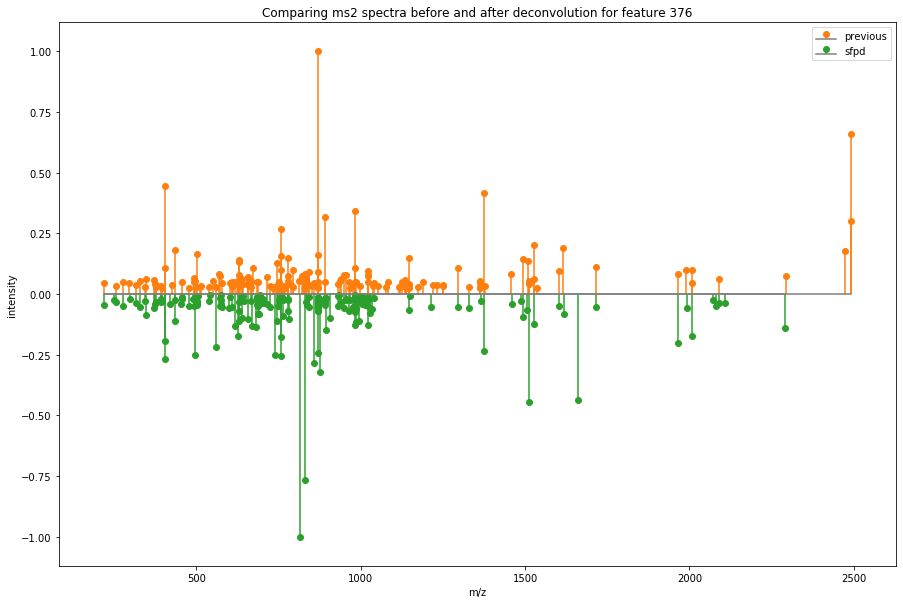

In [39]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(pasef_df.mz, pasef_df.normalised_intensity, label='previous', use_line_collection=True)
plt.setp(markerline, 'color', colors[1])
plt.setp(stemlines, 'color', colors[1])
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(sfpd_df.singley_charged_monoisotope_mz, -sfpd_df.normalised_intensity, label='sfpd', use_line_collection=True)
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(10)
f.set_figwidth(15)
# ax.set_xlim((869.43,869.46))
plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms2 spectra before and after deconvolution for feature {}'.format(feature_id))
plt.show()